In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport



In [3]:
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # defining the colour palette
flatui = sns.color_palette(flatui)

# importing the worldcloud module. Wordcloud uses the text sizes to represent the frequency of the text
from wordcloud import WordCloud #conda install -c conda-forge wordcloud 

In [60]:
#reading the data file
df=pd.read_csv(r"C:\Users\aflah\Downloads\759921_1312014_bundle_archive\FIFA_data.csv") # reading the dataset


In [53]:
#view the head of the data
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [54]:
#view the column names
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

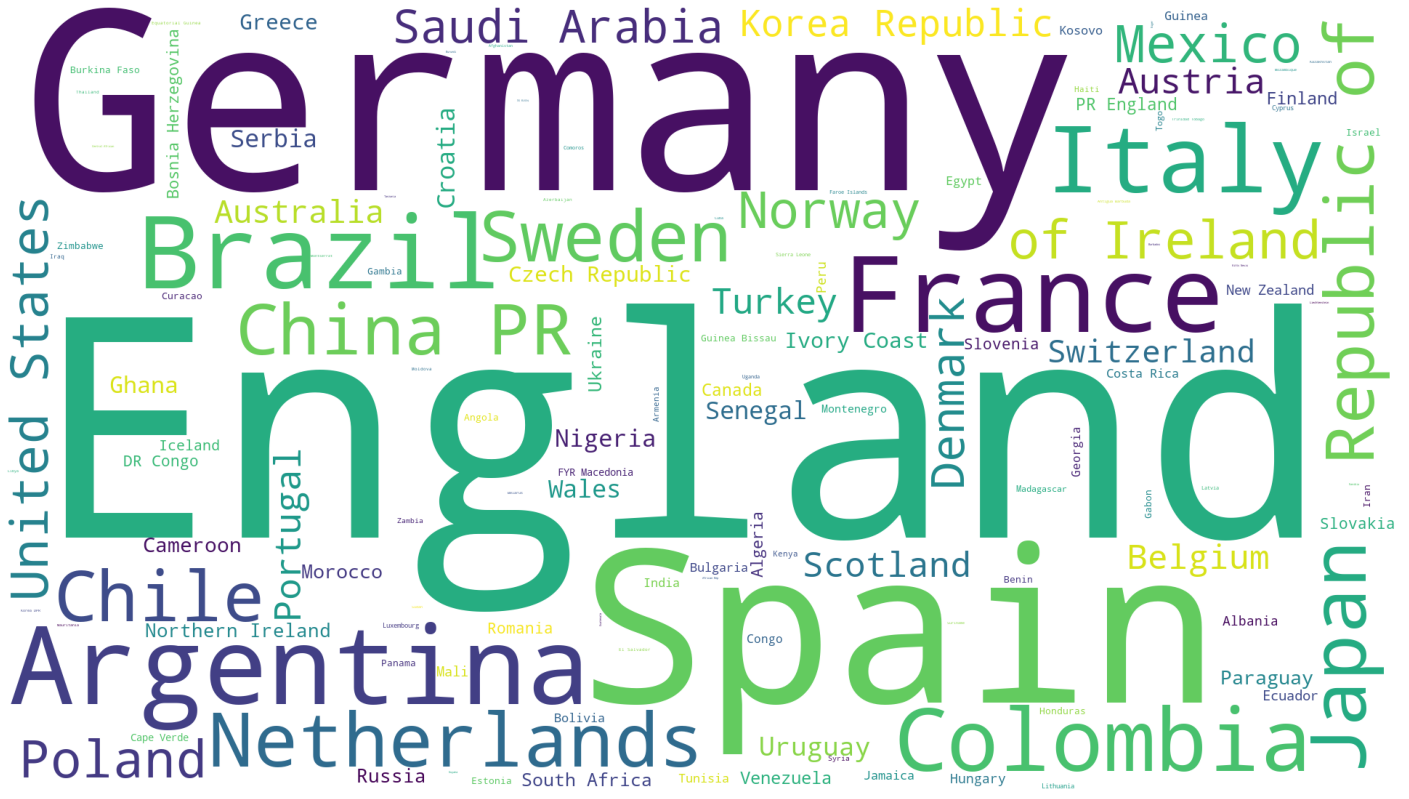

In [18]:
#creating word cloud of nationality
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [28]:
#handling missing values
df['Club'].fillna('No Club', inplace = True) #adding 'No Club' to missing values
df['Position'].fillna('ST', inplace = True) #adding 'ST' for missing values
to_impute_by_mean = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]
for i in to_impute_by_mean.columns: #adding mean to missing values
    df[i].fillna(df[i].mean(), inplace = True)
to_impute_by_mode = df.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in to_impute_by_mode.columns: #adding mode to missing values
    df[i].fillna(df[i].mode()[0], inplace = True)
to_impute_by_median = df.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in to_impute_by_median.columns: #adding median to missing values
    df[i].fillna(df[i].median(), inplace = True)
df.columns[df.isna().any()]
df.fillna(0, inplace = True) 

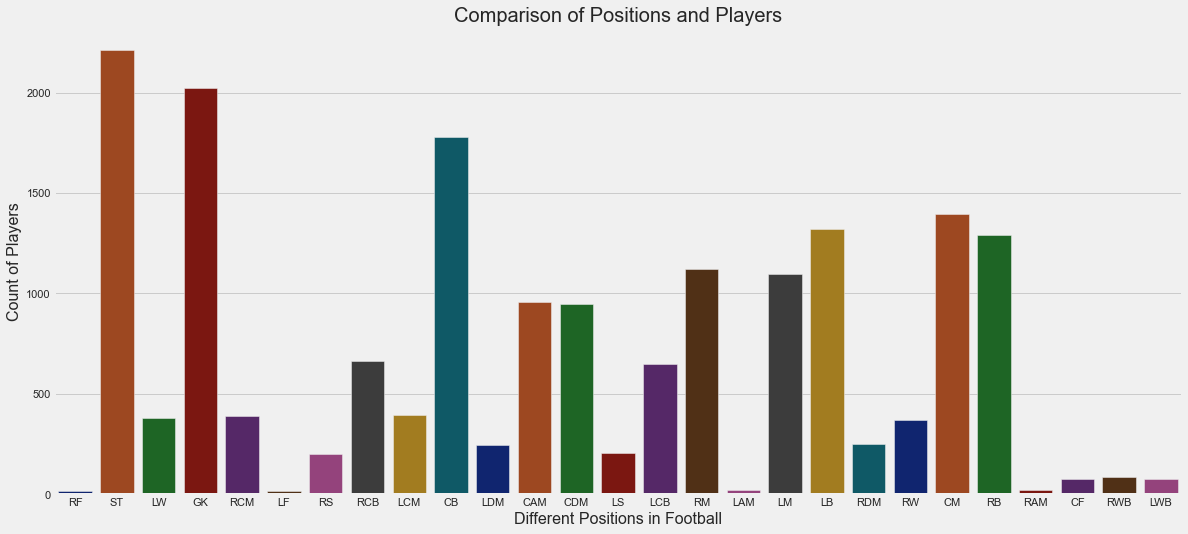

In [35]:
#plotting the players position and counts
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = df, palette = 'dark')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

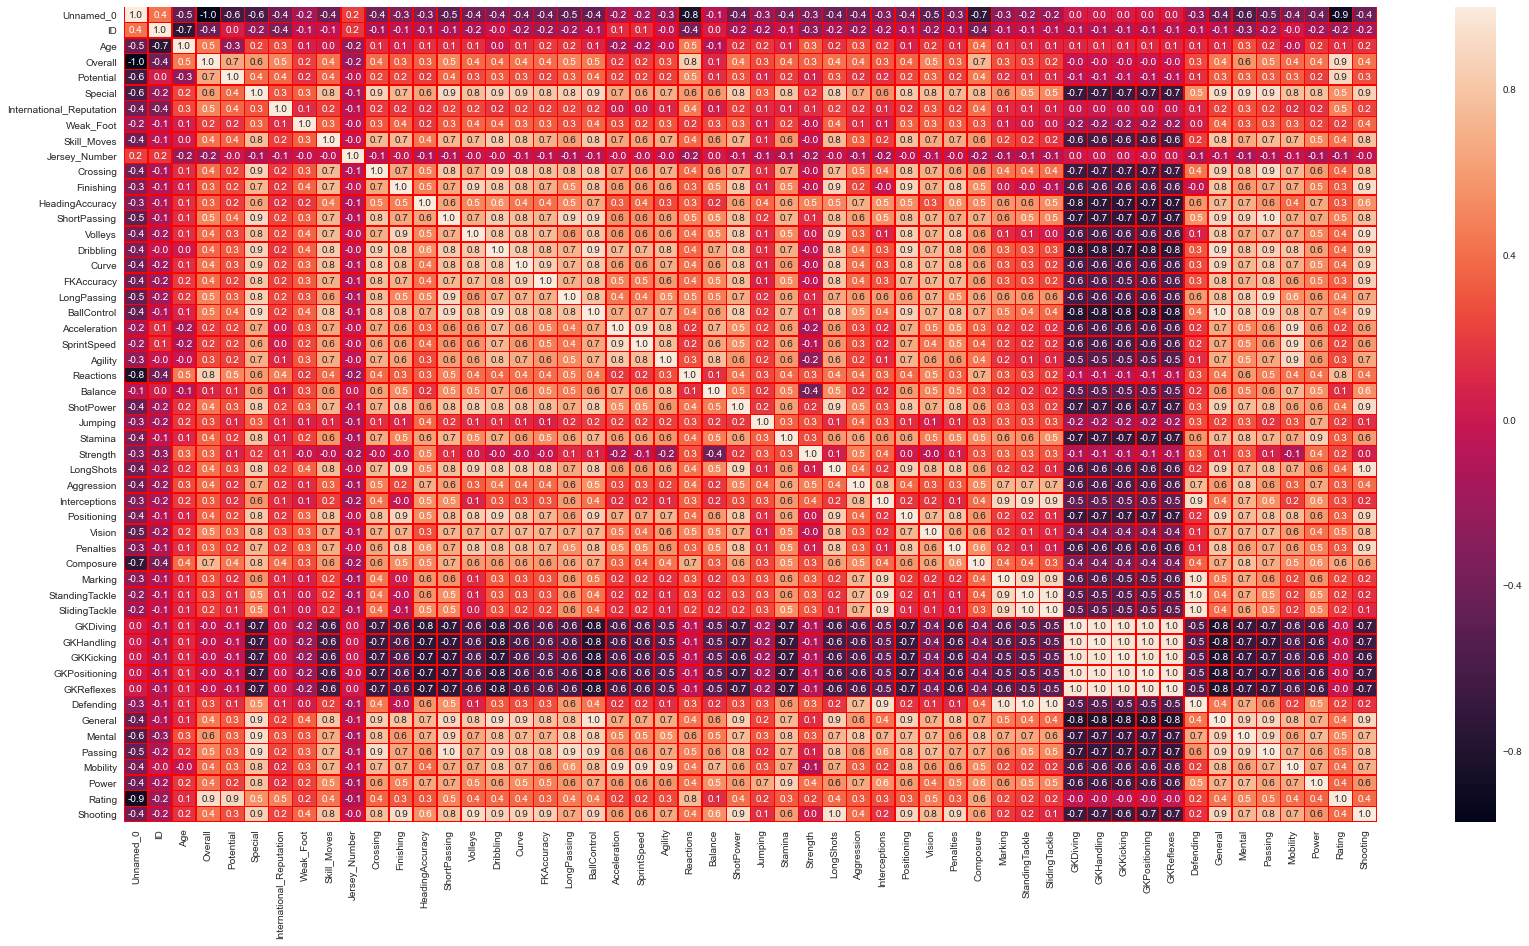

In [44]:
#correlation heat map for all the varibles
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [37]:
#creating a detailed report using pandas profiling
profile = ProfileReport(df,title='Pandas profiling report')
profile.to_widgets()

In [39]:
#functions to calculate the values of general columns,calculated by mean and then rounding up the values
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))
df.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

In [41]:
#creating columns with combined values in general
df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

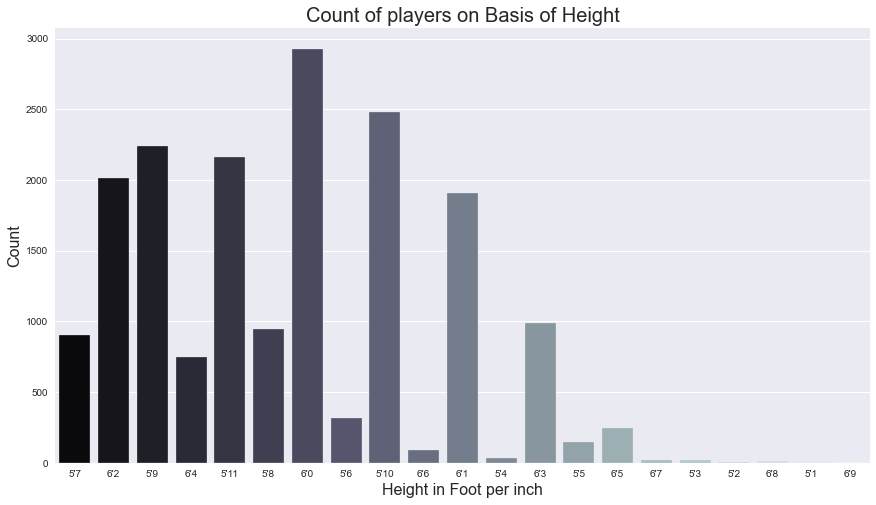

In [42]:
#plot players based on height
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = df, palette = 'bone')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [63]:
data=df.copy()

In [64]:
# finding out the top 10 left footed footballers
left = data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

In [65]:
# finding out the top 10 left footed footballers
right = data[data['Preferred Foot'] == 'right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

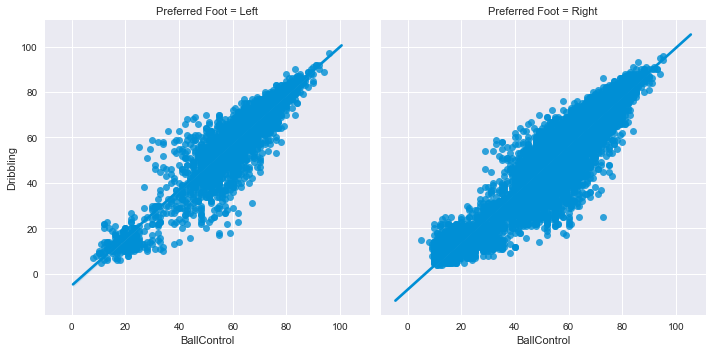

In [66]:
# ballcontrol vs dribbing
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

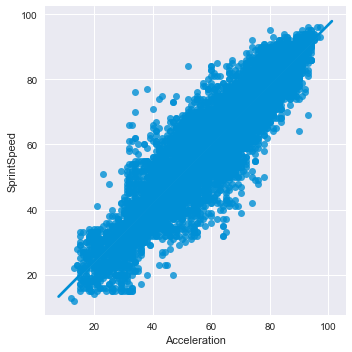

In [67]:
#relation with Aceeleration and sprint speed
sns.lmplot(x = 'Acceleration', y = 'SprintSpeed', data = data)
plt.show()

In [69]:
# checking the clubs where players from the most number of nations play
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(20) 

Club
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Lazio                     18
Empoli                    18
Napoli                    18
AS Monaco                 18
West Ham United           18
Eintracht Frankfurt       18
Bologna                   17
Newcastle United          17
Watford                   17
Leicester City            17
New York City FC          17
KRC Genk                  17
Vejle Boldklub            16
Reading                   16
Celtic                    16
Standard de Liège         16
Manchester United         16
Name: Nationality, dtype: int64

In [73]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [71]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) # dropping the unnamed column

In [72]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [74]:
#printing best player in each area
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best Player {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1


Best Player Crossing : K. De Bruyne
Best Player Finishing : L. Messi
Best Player HeadingAccuracy : Naldo
Best Player ShortPassing : L. Modrić
Best Player Volleys : E. Cavani
Best Player Dribbling : L. Messi
Best Player Curve : Quaresma
Best Player FKAccuracy : L. Messi
Best Player LongPassing : T. Kroos
Best Player BallControl : L. Messi
Best Player Acceleration : Douglas Costa
Best Player SprintSpeed : K. Mbappé
Best Player Agility : Neymar Jr
Best Player Reactions : Cristiano Ronaldo
Best Player Balance : Bernard
Best Player ShotPower : Cristiano Ronaldo
Best Player Jumping : Cristiano Ronaldo
Best Player Stamina : N. Kanté
Best Player Strength : A. Akinfenwa
Best Player LongShots : L. Messi
Best Player Aggression : B. Pearson
Best Player Interceptions : N. Kanté
Best Player Positioning : Cristiano Ronaldo
Best Player Vision : L. Messi
Best Player Penalties : M. Balotelli
Best Player Composure : L. Messi
Best Player Marking : A. Barzagli
Best Player StandingTackle : G. Chiellini
Best